##1. Exploratory Data Analysis (EDA)

#Load and inspect the data for basic properties (data types, missing values, duplicates).

In [103]:
import pandas as pd

df = pd.read_csv('sensor_data.csv')
df.head()

,timestamp,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration
0,08-01-19 14:41,18.55,0.100,29.05,0.092,18.85,0.128
1,08-01-19 14:41,18.55,0.100,29.25,0.092,18.85,0.132
2,08-01-19 14:41,18.65,0.112,29.05,0.114,18.85,0.132
3,08-01-19 14:41,18.65,0.112,29.25,0.114,18.85,0.110
4,08-01-19 14:41,18.65,0.162,29.05,0.100,18.85,0.110


In [104]:
df.dtypes

,0
timestamp,object
x_axis_temperature,float64
x_axis_vibration,float64
y_axis_temperature,float64
y_axis_vibration,float64
z_axis_temperature,float64
z_axis_vibration,float64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   timestamp           1048575 non-null  object 
 1   x_axis_temperature  851967 non-null   float64
 2   x_axis_vibration    851967 non-null   float64
 3   y_axis_temperature  851967 non-null   float64
 4   y_axis_vibration    851967 non-null   float64
 5   z_axis_temperature  851967 non-null   float64
 6   z_axis_vibration    851967 non-null   float64
dtypes: float64(6), object(1)
memory usage: 56.0+ MB


In [106]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                  0
x_axis_temperature    196608
x_axis_vibration      196608
y_axis_temperature    196608
y_axis_vibration      196608
z_axis_temperature    196608
z_axis_vibration      196608
dtype: int64


checking rows for duplicates would take too long and wouldn't generate an useful insight for the dataset

In [107]:
df.describe()

,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration
count,851967.000000,851967.000000,851967.000000,851967.000000,851967.000000,851967.000000
mean,36.867385,1.014780,19.006035,0.139452,17.708302,0.116789
std,176.659111,7.432032,3.899055,0.254899,2.568081,0.026727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.650000,0.168000,18.550000,0.130000,18.150000,0.114000
50%,17.650000,0.168000,18.550000,0.130000,18.150000,0.114000
75%,17.650000,0.168000,18.550000,0.130000,18.150000,0.114000
max,1638.350000,65.535000,31.750000,23.732000,22.850000,1.160000


#Visualize the behavior of each sensor over time to identify trends, seasonality, or abrupt changes.

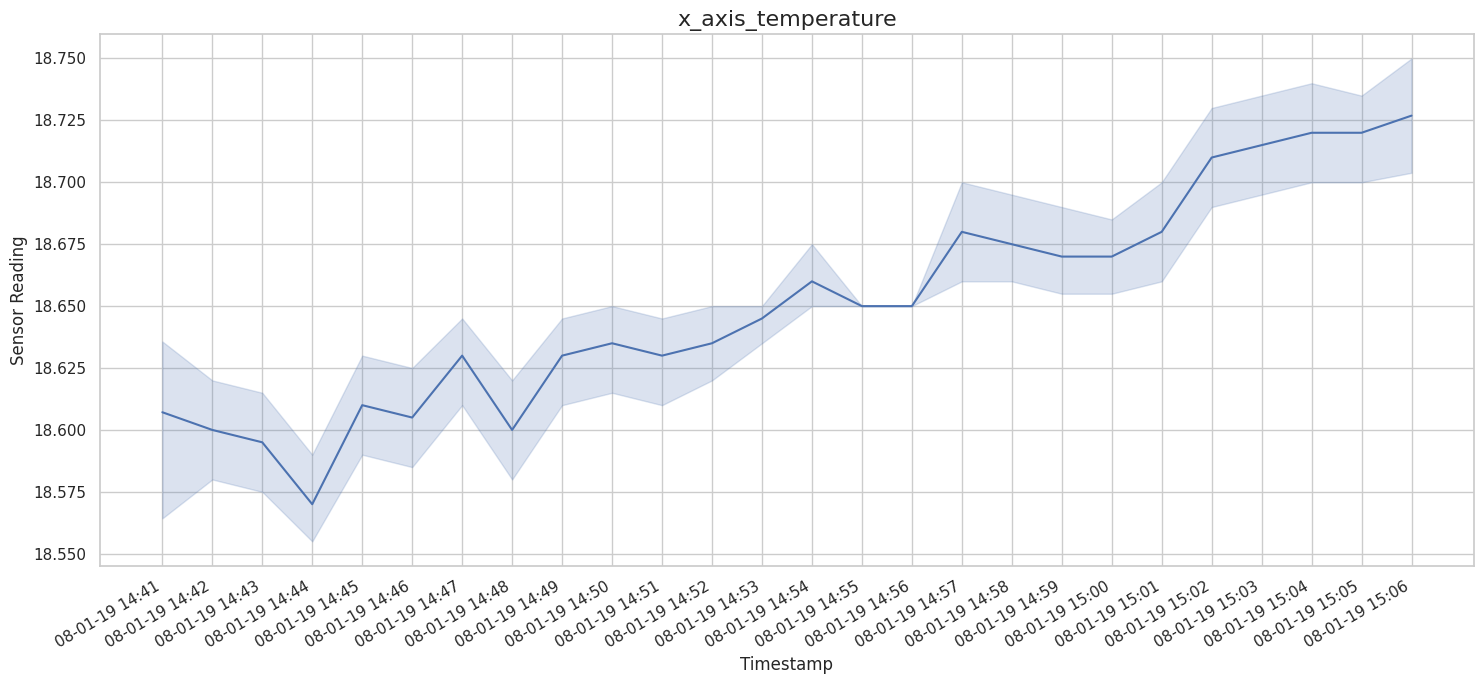

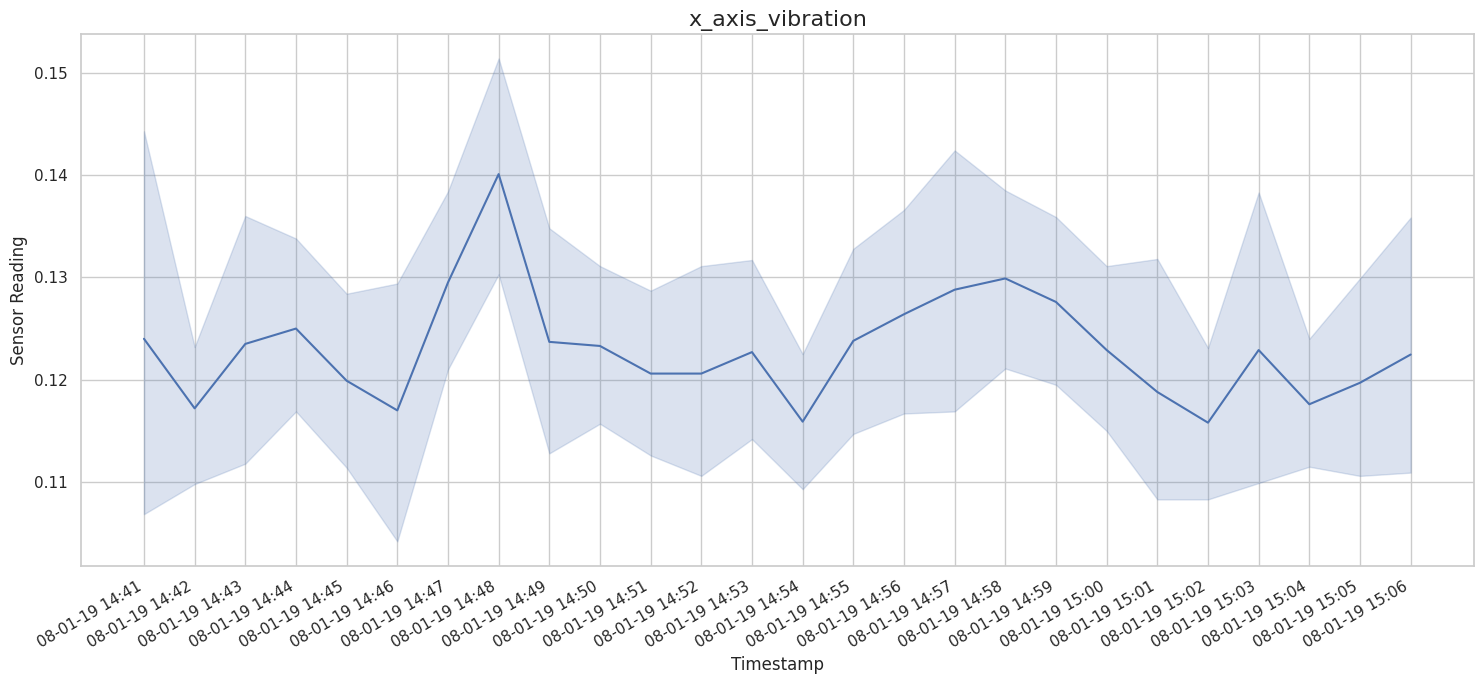

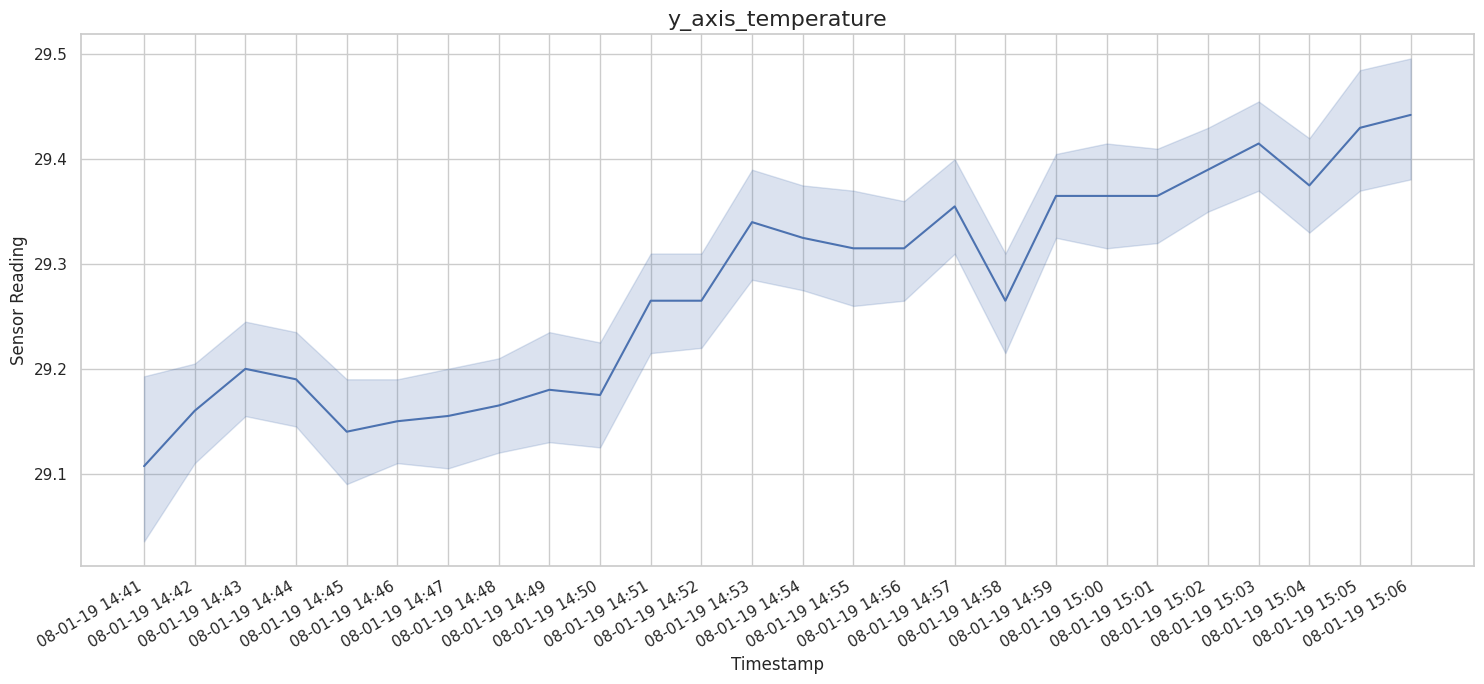

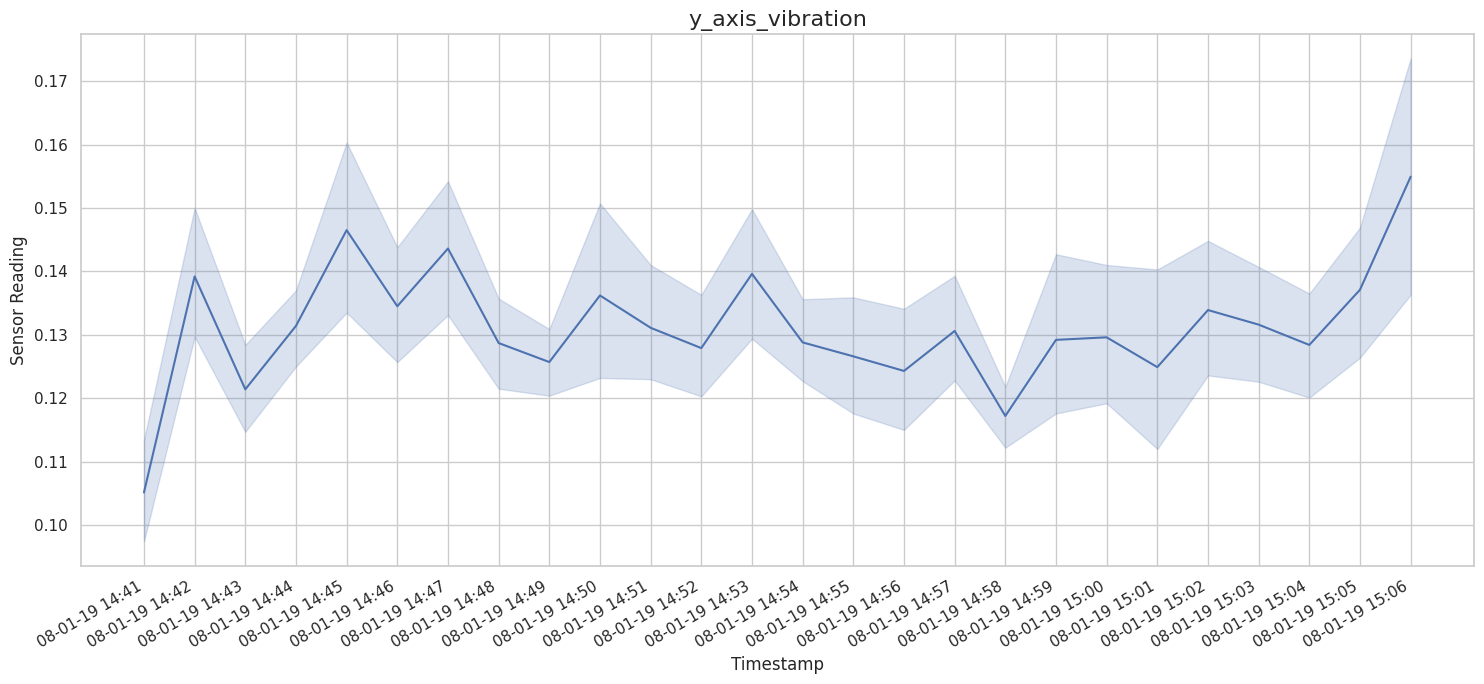

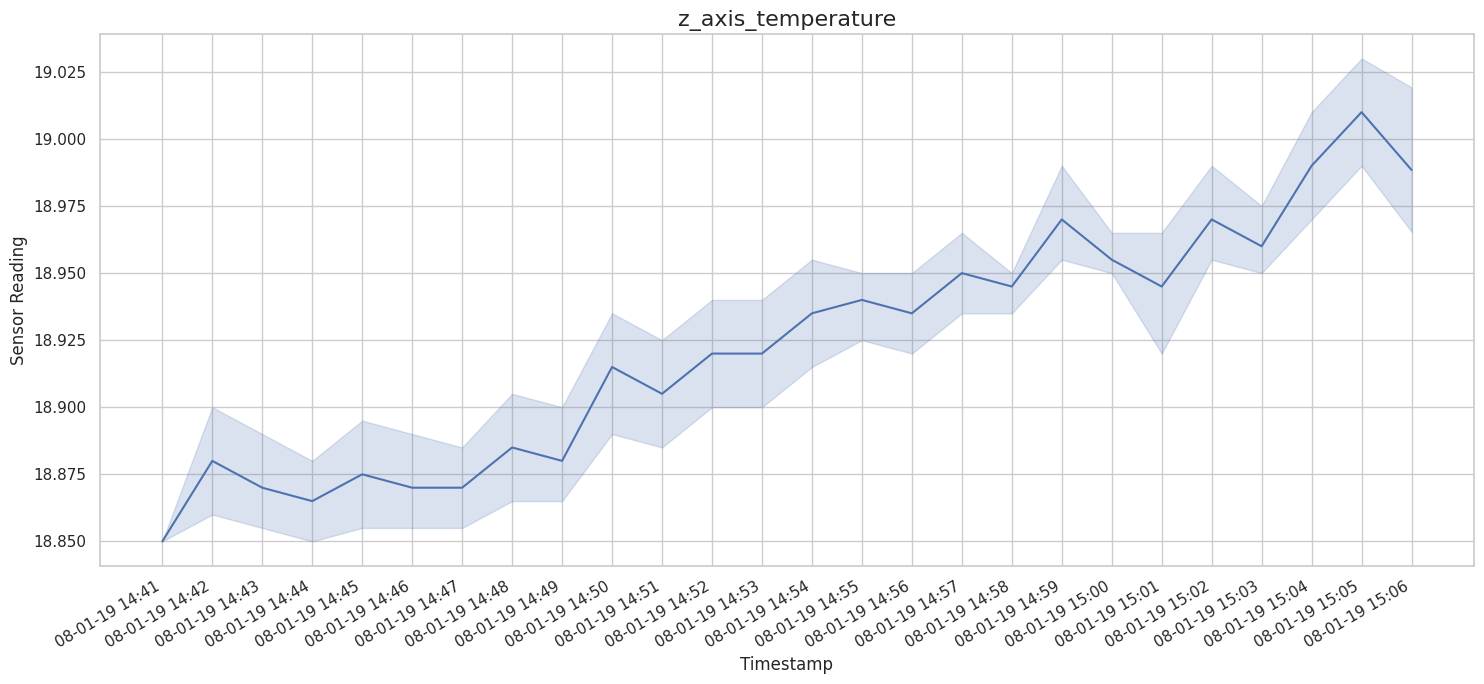

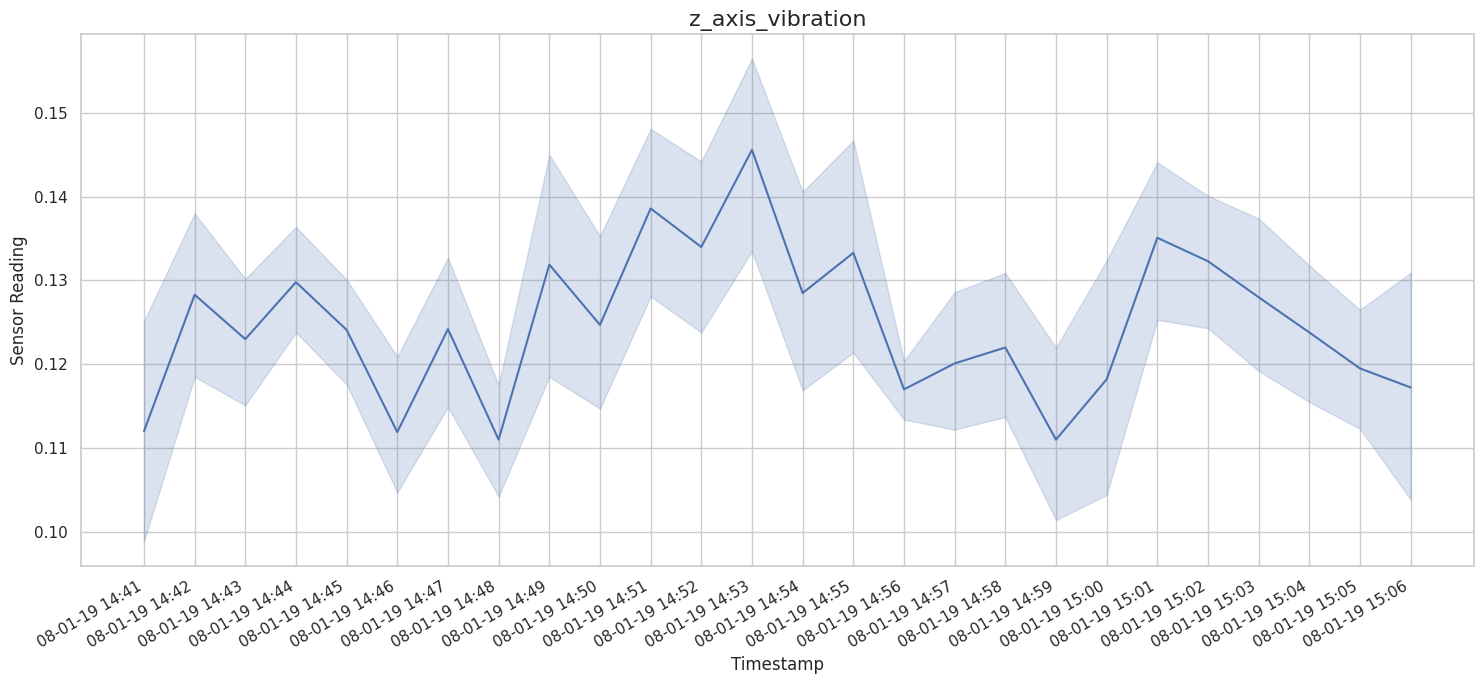

In [108]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_data(df):

    sensor_cols_to_plot = df.select_dtypes(include=np.number).columns.tolist()

    sns.set_theme(style="whitegrid")

    for sensor in sensor_cols_to_plot:
        # Create a new figure for each plot to keep them separate
        plt.figure(figsize=(15, 7))

        # Create the line plot
        ax = sns.lineplot(
            x='timestamp',
            y=sensor,
            data=df
        )

        # Set titles and labels
        ax.set_title(f'{sensor}', fontsize=16)
        ax.set_xlabel('Timestamp', fontsize=12)
        ax.set_ylabel('Sensor Reading', fontsize=12)

        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()


df = df.dropna()

plot_data(df[0:500])

#Analyze the distributions of sensor readings to understand their typical ranges and identify potential outliers.

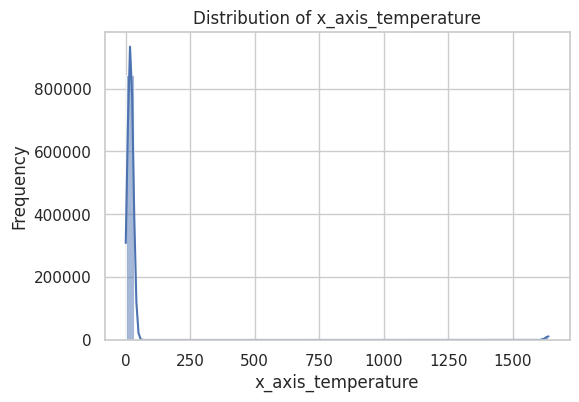

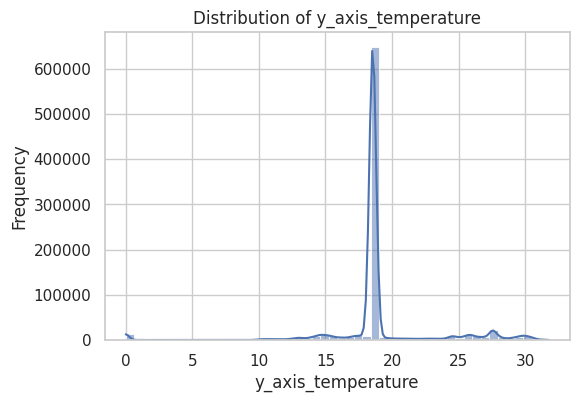

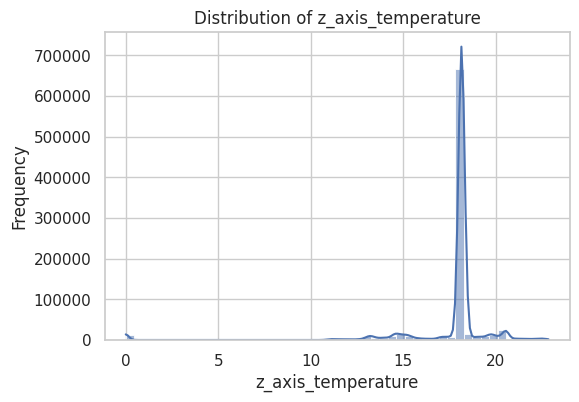

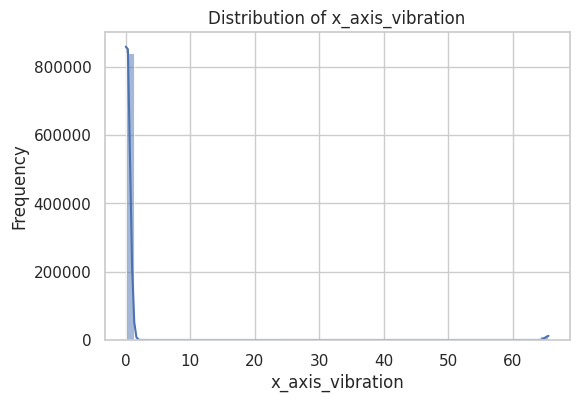

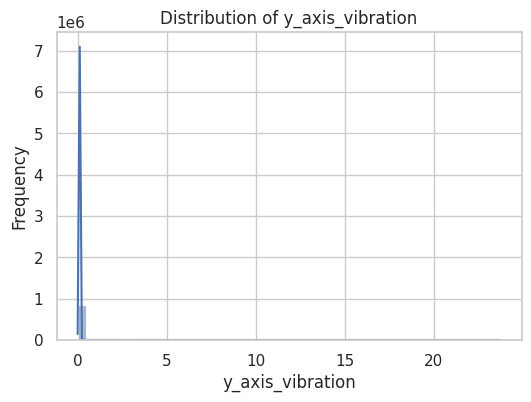

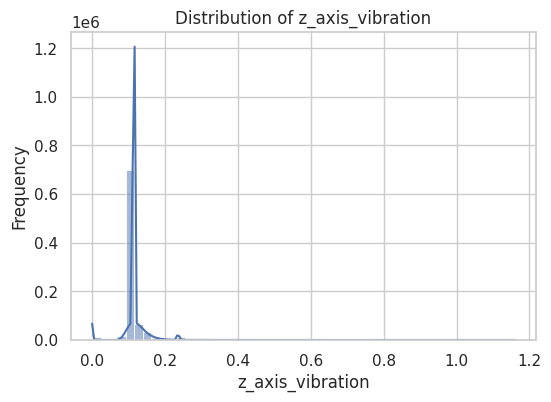

In [109]:
sensor_columns = ["x_axis_temperature", "y_axis_temperature", "z_axis_temperature", 'x_axis_vibration', 'y_axis_vibration', 'z_axis_vibration']  # replace with your real sensor names

# Histograms
for col in sensor_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)  # kde=True adds smooth density curve
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

outlier detection

In [110]:
from sklearn.ensemble import IsolationForest

# Sadece sensör kolonlarını seç
sensor_cols = ["x_axis_temperature", "y_axis_temperature", "z_axis_temperature", "x_axis_vibration", "y_axis_vibration", "z_axis_vibration"]
X = df[sensor_cols]

# Modeli tanımla
iso = IsolationForest(contamination=0.01, random_state=42, n_jobs=-1)
df["outlier"] = iso.fit_predict(X)

# outlier=-1 --> anormal, 1 --> normal
outliers = df[df["outlier"] == -1]
print("Outlier count:", len(outliers))

Outlier count: 2414


In [111]:
def show_stats(df, cols, label):
    print(f"\n--- {label} ---")
    print(df[cols].describe(percentiles=[0.01,0.05,0.95,0.99]))

sensor_cols = ["x_axis_temperature", "y_axis_temperature", "z_axis_temperature", "x_axis_vibration", "y_axis_vibration", "z_axis_vibration"]

# Outlier yokken
show_stats(df, sensor_cols, "Whole data set")

# Outlier'lar çıkarıldıktan sonra
clean_df = df[df["outlier"] == 1]
show_stats(clean_df, sensor_cols, "After removing outliers")


--- Whole data set ---
       x_axis_temperature  y_axis_temperature  z_axis_temperature  \
count       851967.000000       851967.000000       851967.000000   
mean            36.867385           19.006035           17.708302   
std            176.659111            3.899055            2.568081   
min              0.000000            0.000000            0.000000   
1%               0.000000            0.000000            0.000000   
5%              14.050000           14.750000           14.350000   
50%             17.650000           18.550000           18.150000   
95%             21.650000           27.550000           19.950000   
99%           1638.350000           30.050000           21.550000   
max           1638.350000           31.750000           22.850000   

       x_axis_vibration  y_axis_vibration  z_axis_vibration  
count     851967.000000     851967.000000     851967.000000  
mean           1.014780          0.139452          0.116789  
std            7.432032       

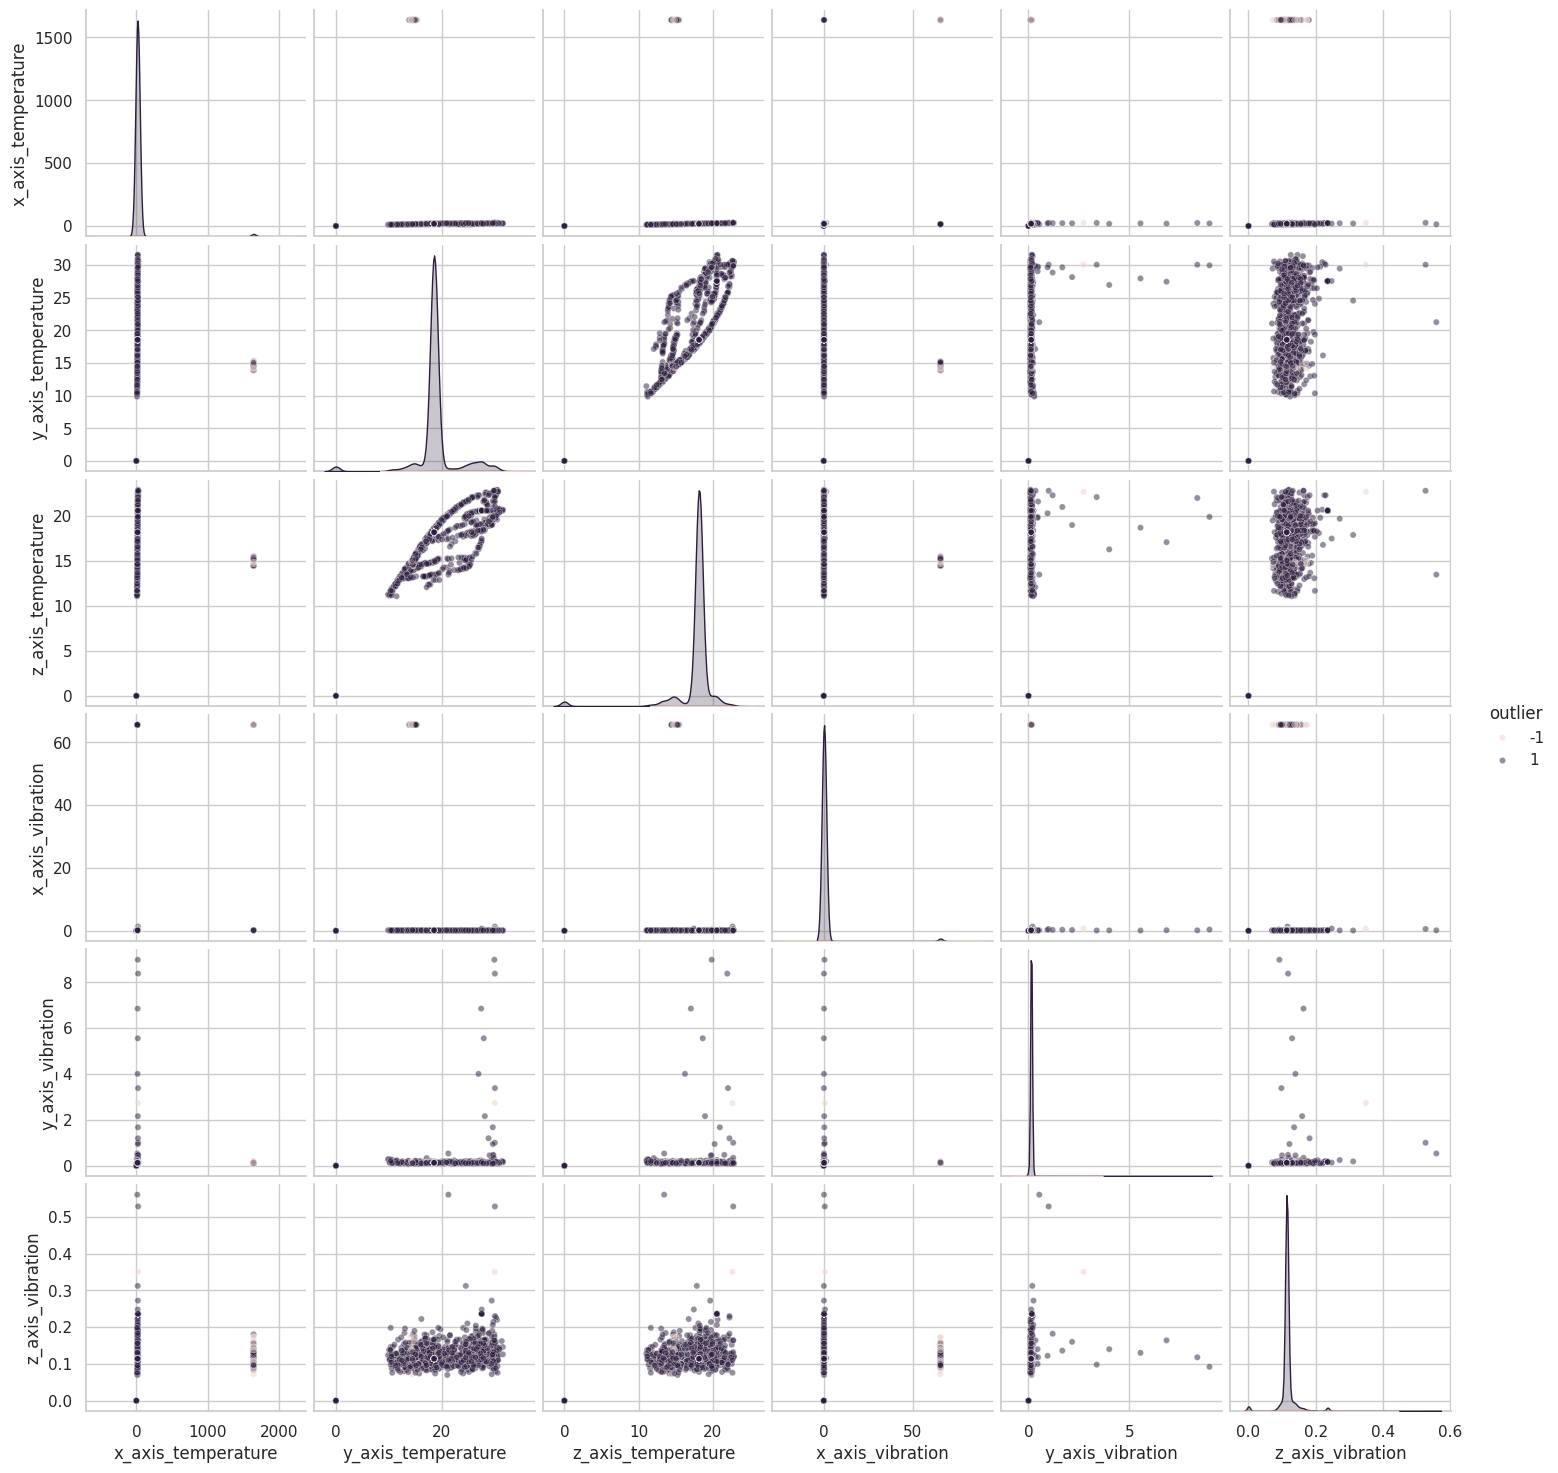

In [112]:
sns.pairplot(
    df.sample(5000),  # büyük veri olduğu için
    vars=["x_axis_temperature","y_axis_temperature","z_axis_temperature",
          "x_axis_vibration","y_axis_vibration","z_axis_vibration"],
    hue="outlier",
    plot_kws={"alpha":0.5, "s":20}
)
plt.show()


In [113]:
df = clean_df
df = df.drop(columns=["outlier"])
df.head()

,timestamp,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration
0,08-01-19 14:41,18.55,0.100,29.05,0.092,18.85,0.128
1,08-01-19 14:41,18.55,0.100,29.25,0.092,18.85,0.132
2,08-01-19 14:41,18.65,0.112,29.05,0.114,18.85,0.132
3,08-01-19 14:41,18.65,0.112,29.25,0.114,18.85,0.110
4,08-01-19 14:41,18.65,0.162,29.05,0.100,18.85,0.110


##2. Data Preprocessing

#Ensure the timestamp column is converted to the correct datetime format.

In [114]:
if 'timestamp' in df.columns: #kod ikinci kez çalıştığında  hata almamak için
        df['timestamp'] = pd.to_datetime(df['timestamp']) # coerce ve format eklenmeli
        df = df.set_index('timestamp')
df.head(5).index.tolist()

/tmp/ipython-input-1885158792.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp']) # coerce ve format eklenmeli


[Timestamp('2019-08-01 14:41:00'),
 Timestamp('2019-08-01 14:41:00'),
 Timestamp('2019-08-01 14:41:00'),
 Timestamp('2019-08-01 14:41:00'),
 Timestamp('2019-08-01 14:41:00')]

#Consider the trade-offs of resampling the data to a lower frequency (e.g., 15-second, 1-minute averages or 1-hour averages). Justify your choice based on whether it reduces noise without losing critical information.

In [115]:
def resampler(df, sec_size):

    resampled_df = df.resample(sec_size).mean()

    num_rows_before = len(df.index)
    num_rows_after = len(resampled_df.index)

    print("Before resample:", num_rows_before)
    print(f"After {sec_size} resample:", num_rows_after)
    print("-" * 27)

    return resampled_df

df_1h = resampler(df, '1h')
df_1m = resampler(df, '1min')
df_15s = resampler(df, '15s')
df_5m = resampler(df, '5min')
df_1M = resampler(df, '1M')
df_80s = resampler(df, '80s')
df_45s = resampler(df, '45s')

Before resample: 849553
After 1h resample: 8040
---------------------------
Before resample: 849553
After 1min resample: 482400
---------------------------
Before resample: 849553
After 15s resample: 1929597
---------------------------
Before resample: 849553
After 5min resample: 96480
---------------------------


/tmp/ipython-input-3068638435.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df.resample(sec_size).mean()


Before resample: 849553
After 1M resample: 12
---------------------------
Before resample: 849553
After 80s resample: 361800
---------------------------
Before resample: 849553
After 45s resample: 643199
---------------------------


Here drawing a graph wouldn't give any meaningful insight so we continued
our analysis with comparing standart deviation values for each sampling.

In [116]:
def analyze_resampling_impact(df, *resampled_dfs):
    """
    Tüm sensörler için resampling etkisini analiz eder
    df: Orijinal dataframe
    *resampled_dfs: Resample edilmiş dataframe'ler (tuple formatında: (df, freq_name))
    """
    sensors = ["x_axis_temperature", "y_axis_temperature", "z_axis_temperature",
               "x_axis_vibration", "y_axis_vibration", "z_axis_vibration"]

    results = {}

    for sensor in sensors:
        try:
            original_std = df[sensor].std()

            resampled_std = {}
            variations = {}

            for resampled_df, freq_name in resampled_dfs:
                std_val = resampled_df[sensor].std()
                resampled_std[freq_name] = std_val
                variation = abs((std_val - original_std) / original_std) * 100
                variations[freq_name] = variation

            results[sensor] = {
                'original_std': original_std,
                'resampled_std': resampled_std,
                'variations': variations
            }

        except KeyError:
            print(f"Uyarı: {sensor} veri çerçevelerde bulunamadı")
            continue

    return results

def print_results(results):
    """
    Detaylı sonuçları yazdırır
    """
    print("=" * 60)
    print("TÜM SENSÖRLER İÇİN RESAMPLING ANALİZİ")
    print("=" * 60)

    for sensor, data in results.items():
        print(f"\n🔹 {sensor}:")
        print(f"   Orijinal STD: {data['original_std']:.4f}")
        for freq_name, std_val in data['resampled_std'].items():
            variation = data['variations'][freq_name]
            print(f"   {freq_name}: {std_val:.4f} (%{variation:.2f} değişim)")

def print_summary_statistics(results):
    """
    Özet istatistikleri yazdırır
    """
    if not results:
        print("Sonuç bulunamadı!")
        return

    print("\n" + "=" * 60)
    print("ÖZET İSTATİSTİKLER - ORTALAMA DEĞİŞİMLER")
    print("=" * 60)

    # Tüm frekansları topla
    all_freqs = set()
    for sensor_data in results.values():
        all_freqs.update(sensor_data['variations'].keys())

    # Her frekans için ortalama değişim
    avg_variations = {freq: 0 for freq in all_freqs}
    count = len(results)

    for sensor_data in results.values():
        for freq, variation in sensor_data['variations'].items():
            avg_variations[freq] += variation

    for freq in avg_variations:
        avg_variations[freq] /= count

    print(f"\nOrtalama STD Değişimi:")
    for freq, avg_var in avg_variations.items():
        print(f"   {freq}: %{avg_var:.2f}")


# Fonksiyonları kullanma örneği
# İstediğiniz resample edilmiş dataframe'leri gönderebilirsiniz
results = analyze_resampling_impact(
    df,
    (df_15s, '15s'),
    (df_45s, '45s'),
    (df_1m, '1min'),
    (df_80s, '80s'),
    (df_5m, '5min'),
    (df_1h, '1h'),
    (df_1M, '1M')
)

# Detaylı sonuçları göster
print_results(results)

# Özet istatistikleri göster
print_summary_statistics(results)

# Ek olarak: Her sensör için en iyi frekansı göster
print("\n" + "=" * 60)
print("HER SENSÖR İÇİN EN İYİ FREKANS")
print("=" * 60)

for sensor, data in results.items():
    if data['variations']:
        best_freq = min(data['variations'].items(), key=lambda x: x[1])
        print(f"{sensor}: {best_freq[0]} (%{best_freq[1]:.2f} değişimle)")

TÜM SENSÖRLER İÇİN RESAMPLING ANALİZİ

🔹 x_axis_temperature:
   Orijinal STD: 155.7233
   15s: 142.0054 (%8.81 değişim)
   45s: 142.0054 (%8.81 değişim)
   1min: 142.0054 (%8.81 değişim)
   80s: 141.5715 (%9.09 değişim)
   5min: 139.9393 (%10.14 değişim)
   1h: 134.2950 (%13.76 değişim)
   1M: 15.5090 (%90.04 değişim)

🔹 y_axis_temperature:
   Orijinal STD: 3.8967
   15s: 3.9007 (%0.10 değişim)
   45s: 3.9007 (%0.10 değişim)
   1min: 3.9007 (%0.10 değişim)
   80s: 3.9020 (%0.14 değişim)
   5min: 3.9112 (%0.37 değişim)
   1h: 3.9822 (%2.19 değişim)
   1M: 1.4128 (%63.74 değişim)

🔹 z_axis_temperature:
   Orijinal STD: 2.5671
   15s: 2.5711 (%0.16 değişim)
   45s: 2.5711 (%0.16 değişim)
   1min: 2.5711 (%0.16 değişim)
   80s: 2.5726 (%0.22 değişim)
   5min: 2.5850 (%0.70 değişim)
   1h: 2.6864 (%4.65 değişim)
   1M: 0.7578 (%70.48 değişim)

🔹 x_axis_vibration:
   Orijinal STD: 6.6297
   15s: 6.2737 (%5.37 değişim)
   45s: 6.2737 (%5.37 değişim)
   1min: 6.2737 (%5.37 değişim)
   80s: 6.2

By looking at these results we can conclude that optimal choice would be to resample with 1 minute.

#Apply appropriate scaling to the sensor data. Research different scaling techniques (e.g., MinMaxScaler, StandardScaler) and determine which is most suitable for the models you plan to test.

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)

print(scaled_df.head())

                     x_axis_temperature  x_axis_vibration  y_axis_temperature  \
timestamp                                                                       
2019-08-01 14:41:00           -0.089457         -0.111315            2.574694   
2019-08-01 14:41:00           -0.089457         -0.111315            2.626019   
2019-08-01 14:41:00           -0.088815         -0.109505            2.574694   
2019-08-01 14:41:00           -0.088815         -0.109505            2.626019   
2019-08-01 14:41:00           -0.088815         -0.101963            2.574694   

                     y_axis_vibration  z_axis_temperature  z_axis_vibration  
timestamp                                                                    
2019-08-01 14:41:00         -0.188670            0.441813          0.426402  
2019-08-01 14:41:00         -0.188670            0.441813          0.577747  
2019-08-01 14:41:00         -0.100357            0.441813          0.577747  
2019-08-01 14:41:00         -0.100357     

First, outliers in the dataset were removed. Then, since the sensor features had different scales and variances, they were normalized using StandardScaler. This ensured all features have a mean of 0 and a standard deviation of 1, optimizing the performance of the anomaly detection and RUL prediction models.

In [118]:
print("Now we print standard deviation and mean values for each column to make sure it worked accordingly.")
print()
print("Standard deviation:")
print(scaled_df.std().round(2)) # We rounded these values to have a clearer output.
print()
print("Mean:")
print(scaled_df.mean().round(2))

Now we print standard deviation and mean values for each column to make sure it worked accordingly.

Standard deviation:
x_axis_temperature    1.0
x_axis_vibration      1.0
y_axis_temperature    1.0
y_axis_vibration      1.0
z_axis_temperature    1.0
z_axis_vibration      1.0
dtype: float64

Mean:
x_axis_temperature   -0.0
x_axis_vibration     -0.0
y_axis_temperature    0.0
y_axis_vibration     -0.0
z_axis_temperature   -0.0
z_axis_vibration     -0.0
dtype: float64


In [119]:
df = scaled_df

Now original df equals the scaled one.

##3. Feature Engineering


#Lag Features: Create features that represent the state of the machine at past time steps.

In [120]:
def add_lag_features(df, cols, lags):
    """
    Belirtilen kolonlara geçmiş adımları (lag) ekler.

    df: DataFrame (datetime index'li olmalı)
    cols: hangi kolonlar için lag eklenecek
    lags: [1, 2, 3] gibi, kaç adım geriye bakılacağı

    """
    for col in cols:
        for lag in lags:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)
    return df


sensor_cols = ["x_axis_temperature", "y_axis_temperature", "z_axis_temperature",
               "x_axis_vibration", "y_axis_vibration", "z_axis_vibration"]

df = add_lag_features(df, sensor_cols, lags=[1, 2, 3])
print(df.head())

                     x_axis_temperature  x_axis_vibration  y_axis_temperature  \
timestamp                                                                       
2019-08-01 14:41:00           -0.089457         -0.111315            2.574694   
2019-08-01 14:41:00           -0.089457         -0.111315            2.626019   
2019-08-01 14:41:00           -0.088815         -0.109505            2.574694   
2019-08-01 14:41:00           -0.088815         -0.109505            2.626019   
2019-08-01 14:41:00           -0.088815         -0.101963            2.574694   

                     y_axis_vibration  z_axis_temperature  z_axis_vibration  \
timestamp                                                                     
2019-08-01 14:41:00         -0.188670            0.441813          0.426402   
2019-08-01 14:41:00         -0.188670            0.441813          0.577747   
2019-08-01 14:41:00         -0.100357            0.441813          0.577747   
2019-08-01 14:41:00         -0.100357

Thanks to lag features, model will not only be able to see the current reading but also the trend in previous steps. Therefore increasing the learning capacity.

In [121]:
df = df.dropna()

Since we have a big dataset it is okay to lose few values.

#Rolling Window Features: Calculate statistics (e.g., moving average, standard deviation) over a defined time window to capture the machine's recent behavior and volatility.

In [122]:
def add_rolling_features(df, window_size=3, period =3):
    """
    DataFrame'e rolling mean ve rolling std kolonlarını ekler.

    Args:
        df (pd.DataFrame): Orijinal DataFrame
        window_size (int): Rolling window boyutu

    Returns:
        pd.DataFrame: Yeni kolonlar eklenmiş DataFrame
    """
    new_cols = {}

    for col in df.columns:
        if df[col].dtype in [float, int]:
            new_cols[f"{col}_roll_mean"] = df[col].rolling(window=window_size, min_periods = period).mean()
            new_cols[f"{col}_roll_std"] = df[col].rolling(window=window_size, min_periods = period).std()

    return pd.concat([df, pd.DataFrame(new_cols, index=df.index)], axis=1)

print(add_rolling_features(df, 3, 3))

                     x_axis_temperature  x_axis_vibration  y_axis_temperature  \
timestamp                                                                       
2019-08-01 14:41:00           -0.088815         -0.109505            2.626019   
2019-08-01 14:41:00           -0.088815         -0.101963            2.574694   
2019-08-01 14:41:00           -0.089457         -0.101963            2.600357   
2019-08-01 14:41:00           -0.088815         -0.108298            2.549032   
2019-08-01 14:42:00           -0.089457         -0.108298            2.626019   
...                                 ...               ...                 ...   
2019-02-18 21:10:00           -0.095237         -0.101058           -0.119876   
2019-02-18 21:11:00           -0.095237         -0.101058           -0.119876   
2019-02-18 21:11:00           -0.095237         -0.101058           -0.119876   
2019-02-18 21:11:00           -0.095237         -0.101058           -0.119876   
2019-02-18 21:11:00         

In [123]:
df  = add_rolling_features(df, 3, 3)

#Aggregate Features: Engineer features that summarize the overall state of the machine, such as the average temperature or the magnitude of the vibration vector.


In [124]:
from sklearn.cluster import FeatureAgglomeration

df['avg_temperature'] = df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature']].mean(axis=1)
df['vibration_rms'] = np.sqrt((df['x_axis_vibration']**2 + df['y_axis_vibration']**2 + df['z_axis_vibration']**2) / 3) # 3 ortalam almak için kullanılıyor.
df['temperature_range'] = abs(df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature']].max(axis=1) - df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature']].min(axis = 1))
df.head()

,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration,x_axis_temperature_lag1,x_axis_temperature_lag2,x_axis_temperature_lag3,y_axis_temperature_lag1,...,y_axis_vibration_lag3_roll_std,z_axis_vibration_lag1_roll_mean,z_axis_vibration_lag1_roll_std,z_axis_vibration_lag2_roll_mean,z_axis_vibration_lag2_roll_std,z_axis_vibration_lag3_roll_mean,z_axis_vibration_lag3_roll_std,avg_temperature,vibration_rms,temperature_range
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-01 14:41:00,-0.088815,-0.109505,2.626019,-0.100357,0.441813,-0.254649,-0.088815,-0.089457,-0.089457,2.574694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993006,0.170205,2.714834
2019-08-01 14:41:00,-0.088815,-0.101963,2.574694,-0.156556,0.441813,-0.254649,-0.088815,-0.088815,-0.089457,2.626019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975897,0.182348,2.663509
2019-08-01 14:41:00,-0.089457,-0.101963,2.600357,-0.156556,0.441813,-1.162719,-0.088815,-0.088815,-0.088815,2.574694,...,0.050988,0.022816,0.480584,0.300282,0.480584,0.527299,0.087379,0.984238,0.679907,2.689814
2019-08-01 14:41:00,-0.088815,-0.108298,2.549032,-0.060214,0.441813,-1.162719,-0.089457,-0.088815,-0.088815,2.600357,...,0.050988,-0.557339,0.524274,0.022816,0.480584,0.300282,0.480584,0.967343,0.675097,2.637847
2019-08-01 14:42:00,-0.089457,-0.108298,2.626019,-0.060214,0.480768,1.712833,-0.088815,-0.089457,-0.088815,2.549032,...,0.032447,-0.860029,0.524274,-0.557339,0.524274,0.022816,0.480584,1.005777,0.991489,2.715477


##4. Unsupervised Anomaly Detection

#Research and implement at least two different unsupervised anomaly detection algorithms on your rich feature set. Your goal is to find the method that most logically identifies what appear to be failure states.

Applying Isolation Forest

In [125]:
clf = IsolationForest(random_state=0)

# 1 = normal, -1 = anomaly
clf.fit(df)

anomaly_labels = clf.predict(df)
df['IF_anomaly'] = anomaly_labels

In [126]:
df.head()

,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration,x_axis_temperature_lag1,x_axis_temperature_lag2,x_axis_temperature_lag3,y_axis_temperature_lag1,...,z_axis_vibration_lag1_roll_mean,z_axis_vibration_lag1_roll_std,z_axis_vibration_lag2_roll_mean,z_axis_vibration_lag2_roll_std,z_axis_vibration_lag3_roll_mean,z_axis_vibration_lag3_roll_std,avg_temperature,vibration_rms,temperature_range,IF_anomaly
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-01 14:41:00,-0.088815,-0.109505,2.626019,-0.100357,0.441813,-0.254649,-0.088815,-0.089457,-0.089457,2.574694,...,NaN,NaN,NaN,NaN,NaN,NaN,0.993006,0.170205,2.714834,1
2019-08-01 14:41:00,-0.088815,-0.101963,2.574694,-0.156556,0.441813,-0.254649,-0.088815,-0.088815,-0.089457,2.626019,...,NaN,NaN,NaN,NaN,NaN,NaN,0.975897,0.182348,2.663509,1
2019-08-01 14:41:00,-0.089457,-0.101963,2.600357,-0.156556,0.441813,-1.162719,-0.088815,-0.088815,-0.088815,2.574694,...,0.022816,0.480584,0.300282,0.480584,0.527299,0.087379,0.984238,0.679907,2.689814,-1
2019-08-01 14:41:00,-0.088815,-0.108298,2.549032,-0.060214,0.441813,-1.162719,-0.089457,-0.088815,-0.088815,2.600357,...,-0.557339,0.524274,0.022816,0.480584,0.300282,0.480584,0.967343,0.675097,2.637847,-1
2019-08-01 14:42:00,-0.089457,-0.108298,2.626019,-0.060214,0.480768,1.712833,-0.088815,-0.089457,-0.088815,2.549032,...,-0.860029,0.524274,-0.557339,0.524274,0.022816,0.480584,1.005777,0.991489,2.715477,-1


Visualizations of outliers on some certain columns.

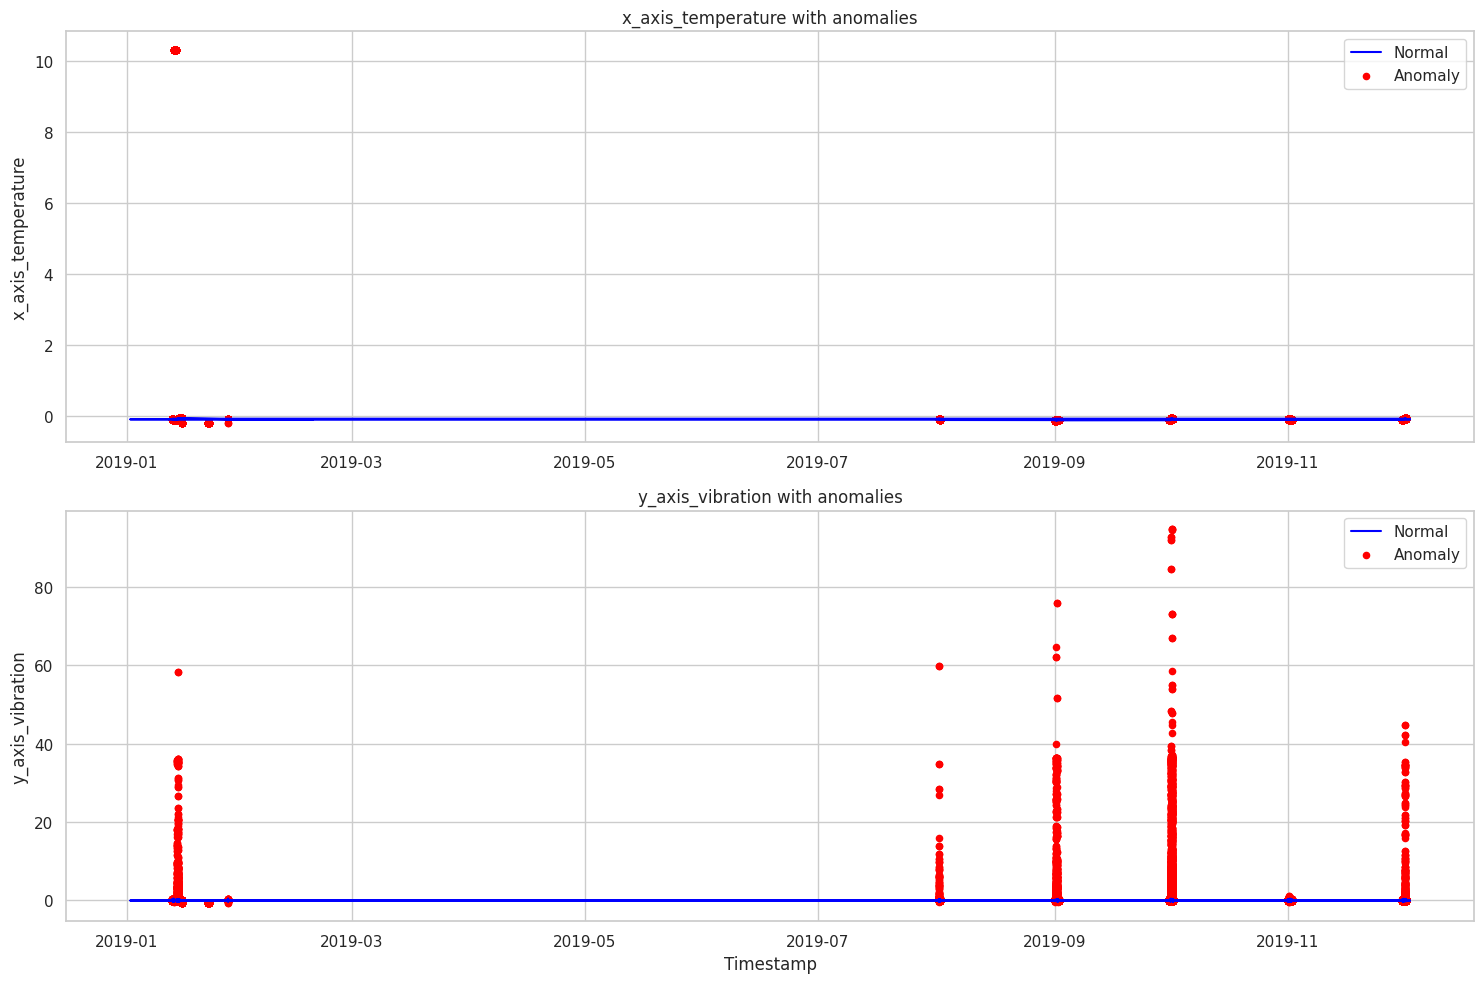

In [127]:
sensor1 = 'x_axis_temperature'
sensor2 = 'y_axis_vibration'

normal = df[df['IF_anomaly'] == 1]
anomalies = df[df['IF_anomaly'] == -1]

plt.figure(figsize=(15,10))

# First subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(normal.index, normal[sensor1], label='Normal', color='blue')
plt.scatter(anomalies.index, anomalies[sensor1], color='red', label='Anomaly', s=20)
plt.title(f'{sensor1} with anomalies')
plt.ylabel(sensor1)
plt.legend()

# Second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(normal.index, normal[sensor2], label='Normal', color='blue')
plt.scatter(anomalies.index, anomalies[sensor2], color='red', label='Anomaly', s=20)
plt.title(f'{sensor2} with anomalies')
plt.xlabel('Timestamp')
plt.ylabel(sensor2)
plt.legend()

plt.tight_layout()
plt.show()

Applying Autoencoder

In [128]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [129]:
# Autoencoder architecture
input_dim = len(['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature',
                 'x_axis_vibration', 'y_axis_vibration', 'z_axis_vibration'])
encoding_dim = 10

In [130]:
# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

In [131]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [132]:
# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [133]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [134]:
# Train the autoencoder
autoencoder.fit(df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature', 'x_axis_vibration', 'x_axis_vibration', 'x_axis_vibration']], df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature', 'x_axis_vibration', 'x_axis_vibration', 'x_axis_vibration']], epochs=35, batch_size=128, shuffle=True)

Epoch 1/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.9012
Epoch 2/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8181
Epoch 3/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.8168
Epoch 4/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8215
Epoch 5/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8203
Epoch 6/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8207
Epoch 7/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8182
Epoch 8/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.8275
Epoch 9/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8164
Epoch 10/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8190
Epoch 11/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8248
Epoch 12/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8326
Epoch 13/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8319
Epoch 14/35
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.8279
Epoch 15/35
663

In [135]:
encoder = Model(inputs=input_layer, outputs=encoded)

In [136]:
latent_features = encoder.predict(df[['x_axis_temperature', 'y_axis_temperature', 'z_axis_temperature', 'x_axis_vibration', 'x_axis_vibration', 'x_axis_vibration']])
print("Latent Features Shape:", latent_features.shape)

26549/26549 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
Latent Features Shape: (849550, 10)


In [137]:
# Reconstruct
X = df[["x_axis_temperature", "y_axis_temperature", "z_axis_temperature",
        "x_axis_vibration", "y_axis_vibration", "z_axis_vibration"]]

X_pred = autoencoder.predict(X)

26549/26549 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


In [138]:
# Computing reconstruction error
reconstruction_error = np.mean(np.square(X - X_pred), axis=1)

In [139]:
# anomaly threshold
threshold = np.percentile(reconstruction_error, 95)  # top 5% errors
df["AE_error"] = reconstruction_error
df["AE_anomaly"] = (reconstruction_error > threshold).astype(int)  # 1 = anomaly, 0 = normal

print(f"Autoencoder marked {df['AE_anomaly'].sum()} anomalies")

Autoencoder marked 42478 anomalies


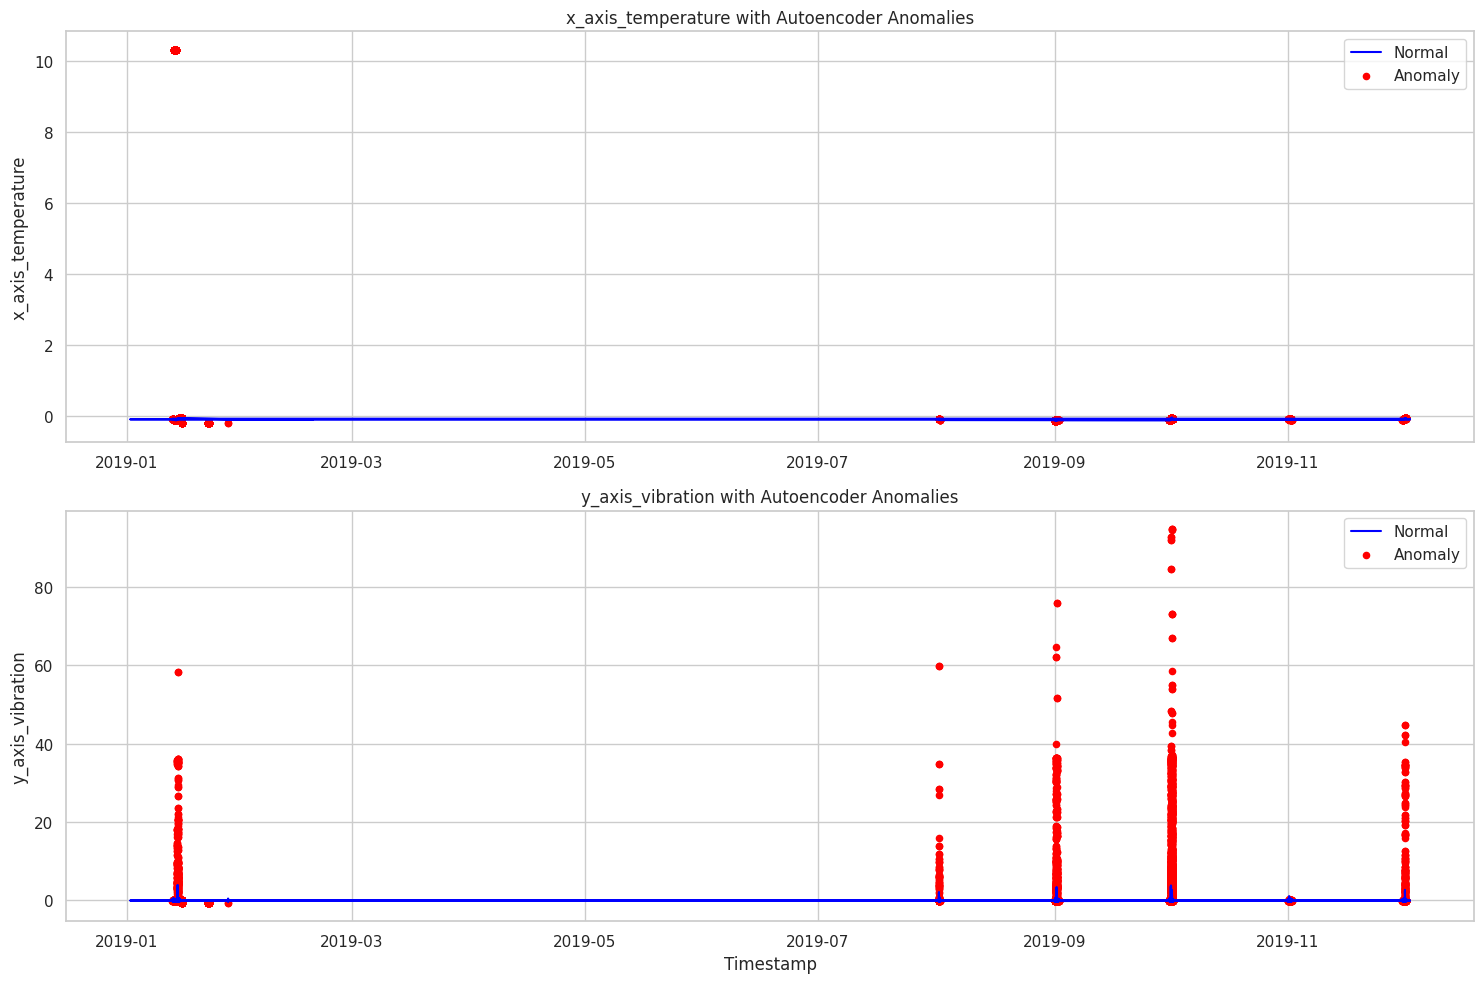

In [140]:
# Visualize
sensor1 = "x_axis_temperature"
sensor2 = "y_axis_vibration"

normal = df[df["AE_anomaly"] == 0]
anomalies = df[df["AE_anomaly"] == 1]

plt.figure(figsize=(15,10))


plt.subplot(2, 1, 1)
plt.plot(normal.index, normal[sensor1], label="Normal", color="blue")
plt.scatter(anomalies.index, anomalies[sensor1], color="red", label="Anomaly", s=20)
plt.title(f"{sensor1} with Autoencoder Anomalies")
plt.ylabel(sensor1)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(normal.index, normal[sensor2], label="Normal", color="blue")
plt.scatter(anomalies.index, anomalies[sensor2], color="red", label="Anomaly", s=20)
plt.title(f"{sensor2} with Autoencoder Anomalies")
plt.xlabel("Timestamp")
plt.ylabel(sensor2)
plt.legend()

plt.tight_layout()
plt.show()

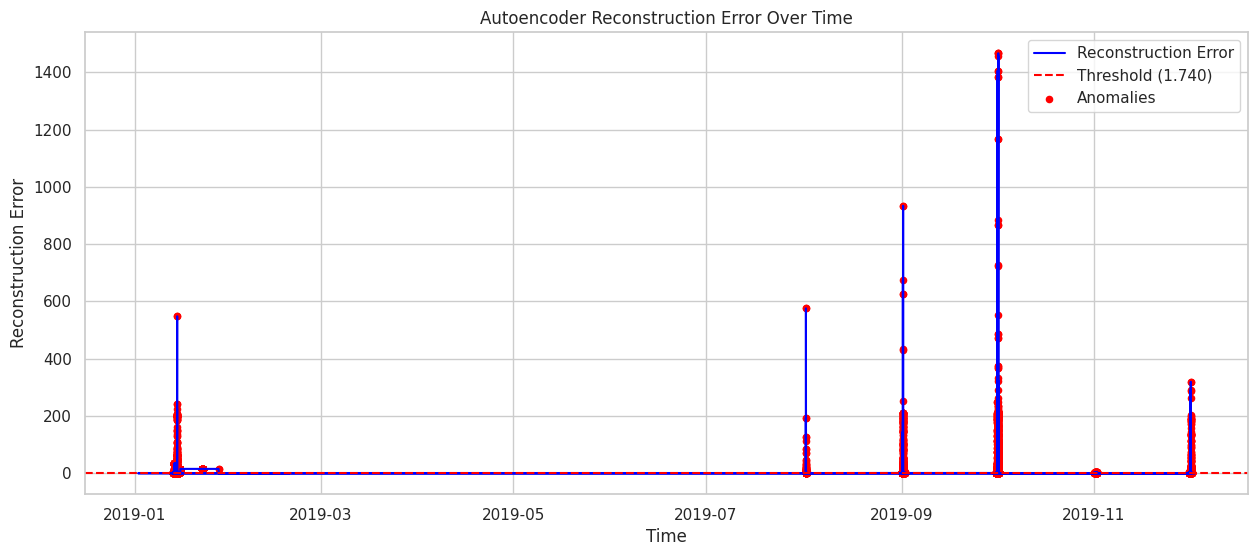

In [141]:
# threshold value
threshold = df["AE_error"].quantile(0.95)

plt.figure(figsize=(15,6))
plt.plot(df.index, df["AE_error"], label="Reconstruction Error", color="blue")
plt.axhline(threshold, color="red", linestyle="--", label=f"Threshold ({threshold:.3f})")

anomalies = df[df["AE_error"] > threshold]
plt.scatter(anomalies.index, anomalies["AE_error"], color="red", s=20, label="Anomalies")

plt.title("Autoencoder Reconstruction Error Over Time")
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()


Confirmed anomalies (AE ∩ IF): 42444
Suspected anomalies (AE only): 34


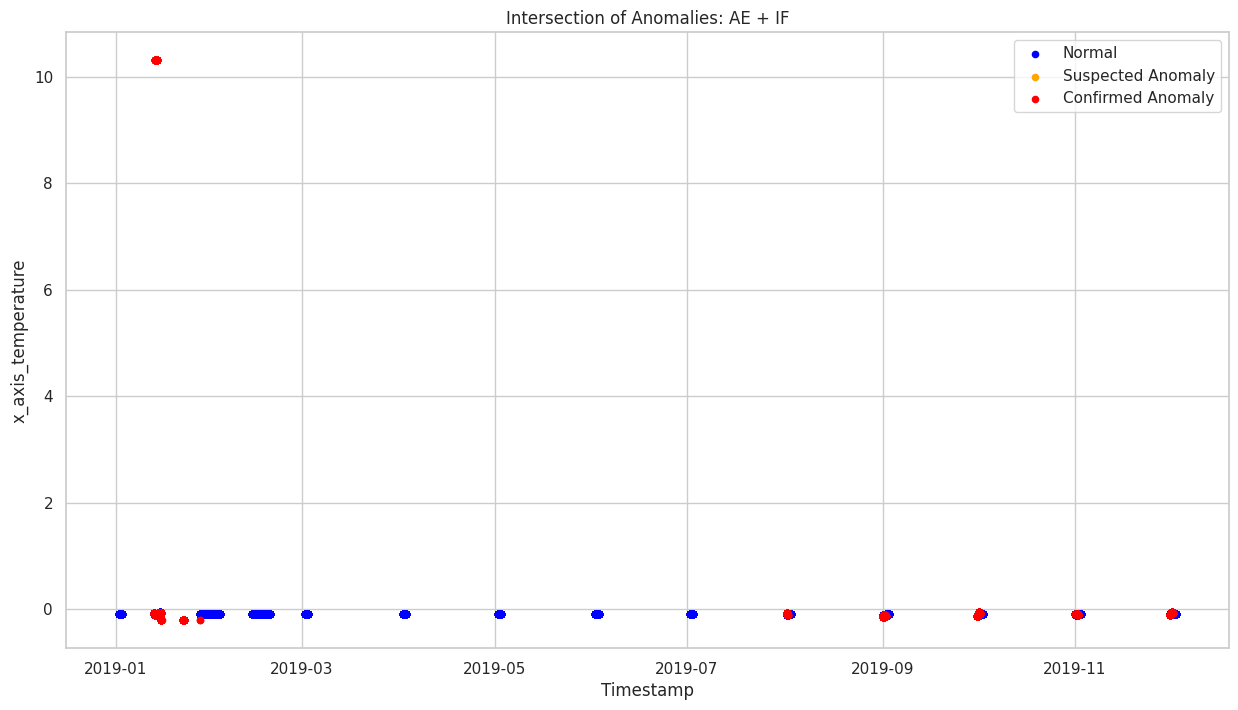

In [142]:
# 0 = normal, 1 = suspected anomaly (AE only), 2 = confirmed anomaly (IF and AE)
df['final_anomaly'] = 0

# AE only
ae_only_mask = (df['AE_anomaly'] == 1) & (df['IF_anomaly'] == 1)
df.loc[ae_only_mask, 'final_anomaly'] = 1  # Suspected anomaly

# Intersection of AE and IF
intersection_mask = (df['AE_anomaly'] == 1) & (df['IF_anomaly'] == -1)
df.loc[intersection_mask, 'final_anomaly'] = 2  # Confirmed anomaly

# Count
print("Confirmed anomalies (AE ∩ IF):", (df['final_anomaly'] == 2).sum())
print("Suspected anomalies (AE only):", (df['final_anomaly'] == 1).sum())

# Visualize
plt.figure(figsize=(15,8))
colors = {0:'blue', 1:'orange', 2:'red'}
labels = {0:'Normal', 1:'Suspected Anomaly', 2:'Confirmed Anomaly'}

for label in [0,1,2]:
    subset = df[df['final_anomaly'] == label]
    plt.scatter(subset.index, subset['x_axis_temperature'],
                color=colors[label], label=labels[label], s=20)

plt.title("Intersection of Anomalies: AE + IF")
plt.xlabel("Timestamp")
plt.ylabel("x_axis_temperature")
plt.legend()
plt.show()

In [143]:
df.head()

,x_axis_temperature,x_axis_vibration,y_axis_temperature,y_axis_vibration,z_axis_temperature,z_axis_vibration,x_axis_temperature_lag1,x_axis_temperature_lag2,x_axis_temperature_lag3,y_axis_temperature_lag1,...,z_axis_vibration_lag2_roll_std,z_axis_vibration_lag3_roll_mean,z_axis_vibration_lag3_roll_std,avg_temperature,vibration_rms,temperature_range,IF_anomaly,AE_error,AE_anomaly,final_anomaly
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-01 14:41:00,-0.088815,-0.109505,2.626019,-0.100357,0.441813,-0.254649,-0.088815,-0.089457,-0.089457,2.574694,...,NaN,NaN,NaN,0.993006,0.170205,2.714834,1,0.456471,0,0
2019-08-01 14:41:00,-0.088815,-0.101963,2.574694,-0.156556,0.441813,-0.254649,-0.088815,-0.088815,-0.089457,2.626019,...,NaN,NaN,NaN,0.975897,0.182348,2.663509,1,0.431222,0,0
2019-08-01 14:41:00,-0.089457,-0.101963,2.600357,-0.156556,0.441813,-1.162719,-0.088815,-0.088815,-0.088815,2.574694,...,0.480584,0.527299,0.087379,0.984238,0.679907,2.689814,-1,0.659412,0,0
2019-08-01 14:41:00,-0.088815,-0.108298,2.549032,-0.060214,0.441813,-1.162719,-0.089457,-0.088815,-0.088815,2.600357,...,0.480584,0.300282,0.480584,0.967343,0.675097,2.637847,-1,0.629327,0,0
2019-08-01 14:42:00,-0.089457,-0.108298,2.626019,-0.060214,0.480768,1.712833,-0.088815,-0.089457,-0.088815,2.549032,...,0.524274,0.022816,0.480584,1.005777,0.991489,2.715477,-1,0.967185,0,0


In [144]:
if 'IF_anomaly' in df.columns:
    if 'AE_error' in df.columns:
        if  'AE_anomaly' in df.columns:
            df = df.drop(columns=['IF_anomaly', 'AE_error', 'AE_anomaly'])

In the end it was decided to mark the intersection of both models as the final error and mark the ones only autoencoder marked as suspected errors.

##5. Remaining Useful Life (RUL) Modeling and Training

#Create the Target Variable: For each "normal" data point, calculate the time (in days or weeks) until the next anomaly event occurs. This will be your target variable (y).

In [145]:
df = df.sort_index()

next_anomaly_time = df.index.to_series().where(df['final_anomaly'] == 2).ffill(limit=None)
next_anomaly_time = df.index.to_series().where(df['final_anomaly'] == 2).bfill()

# Time difference in days
df['RUL_days'] = (next_anomaly_time - df.index.to_series()).dt.total_seconds() / (24*3600)  # convert seconds to days

df.loc[df['final_anomaly'] == 2, 'RUL_days'] = 0

# Keeping only normal points for regression
rul_df = df[df['final_anomaly'] == 0].copy()

print(rul_df[['RUL_days']].head(100))

                      RUL_days
timestamp                     
2019-01-02 00:00:00  11.009722
2019-01-02 00:00:00  11.009722
2019-01-02 00:00:00  11.009722
2019-01-02 00:00:00  11.009722
2019-01-02 00:00:00  11.009722
...                        ...
2019-01-02 00:04:00  11.006944
2019-01-02 00:04:00  11.006944
2019-01-02 00:04:00  11.006944
2019-01-02 00:04:00  11.006944
2019-01-02 00:04:00  11.006944

[100 rows x 1 columns]


#Select and Train a Model: Research and select a powerful regression model capable of handling the complexity of your feature set.

XGBoost was selected due to its effectiveness in modeling complex patterns in sensor data and its suitability for accurate Remaining Useful Life (RUL) prediction.

In [146]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [147]:
# Drop rows with missing or infinite target values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['RUL_days'])

In [148]:
X = df.drop(columns=['final_anomaly', 'RUL_days'])
y = df['RUL_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [149]:
params = {
    'objective': 'reg:squarederror',  # regression
    'max_depth': 4,
    'eta': 0.3,
    'seed': 42
}

In [150]:
model = xgb.train(params, dtrain, num_boost_round=50)

predictions = model.predict(dtest)

##6. Hyperparameter Tuning

#Use a systematic approach (e.g., RandomizedSearchCV, GridSearchCV, or a more advanced Bayesian optimization library) to find the best hyperparameters for your model.


In [154]:
!pip install scikit-optimize

In [172]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

In [173]:
# Define your search space
param_space = {
    'max_depth': (3, 10),        # tree depth
    'learning_rate': (0.01, 0.5, 'log-uniform'),  # eta
    'n_estimators': (50, 500),   # number of trees
    'subsample': (0.5, 1.0),     # row sampling
    'colsample_bytree': (0.5, 1.0),  # column sampling
    'gamma': (0, 5)              # min loss reduction
}

In [174]:
# Use time-series split to avoid leakage
tscv = TimeSeriesSplit(n_splits=3)

In [175]:
opt = BayesSearchCV(
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        tree_method='hist'  # <-- add it here
    ),
    search_spaces=param_space,
    n_iter=10,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

In [176]:
# Run optimization
opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
              n_iter=10, n_jobs=-1, scoring='neg_mean_absolute_error',
              search_spaces={'colsample_bytree': (0.5, 1.0), 'gamma': (0, 5),
                             'learning_rate': (0.01, 0.5, 'log-uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 500),
                             'subsample': (0.5, 1.0)},
              verbose=1)

In [177]:
# Best model parameters
best_params = opt.best_params_
print("Best Parameters:", best_params)

Best Parameters: OrderedDict({'colsample_bytree': 0.6564460840322058, 'gamma': 1, 'learning_rate': 0.051882126927502985, 'max_depth': 10, 'n_estimators': 277, 'subsample': 0.9330712313434677})


In [181]:
# Predict on test set
y_pred = opt.predict(X_test)

##7. Test and Evaluation

In [182]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} days")

Test MAE: 45.882 days


In [187]:
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000

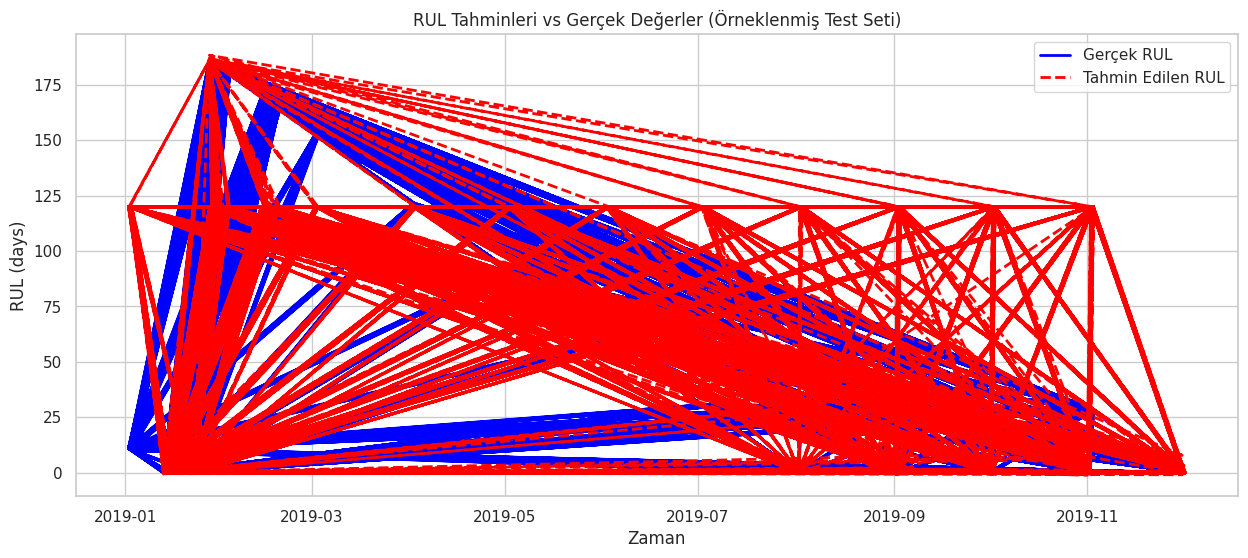

In [188]:
import matplotlib.pyplot as plt

# Test setinden örnekleme: her 10. noktayı al
sample_step = 10
plt.figure(figsize=(15,6))
plt.plot(y_test.index[::sample_step], y_test[::sample_step], label='Gerçek RUL', color='blue', linewidth=2)
plt.plot(y_test.index[::sample_step], y_pred[::sample_step], label='Tahmin Edilen RUL', color='red', linestyle='--', linewidth=2)

plt.title("RUL Tahminleri vs Gerçek Değerler (Örneklenmiş Test Seti)")
plt.xlabel("Zaman")
plt.ylabel("RUL (days)")
plt.legend()
plt.grid(True)
plt.show()